In [1]:

import matplotlib.pyplot as plt
import numpy as np


I = plt.imread('underExposed.jpg')
#I = plt.imread('mic.jpg')


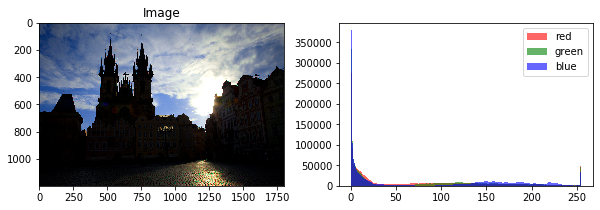

In [2]:
allbins = np.unique(I.ravel())

f, axarr = plt.subplots(1,2, figsize=(10, 3))

axarr[0].imshow(I) #https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html
axarr[0].set_title('Image')

axarr[1].hist(I[...,0].ravel(), allbins, alpha = .6, label = 'red', color = 'r')
axarr[1].hist(I[...,1].ravel(), allbins, alpha = .6, label = 'green', color = 'g')
axarr[1].hist(I[...,2].ravel(), allbins, alpha = .6, label = 'blue', color = 'b')
axarr[1].legend(loc = 'upper right')
plt.show()


In [3]:
Ic = I.copy().astype(float)
Ilog = np.log2(Ic+2)
Ilog = Ilog/Ilog.ravel().max()

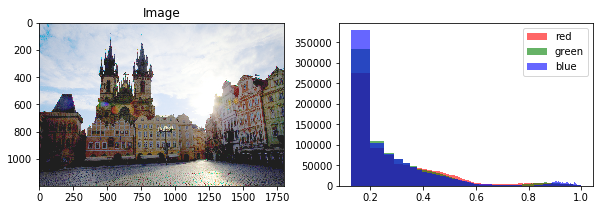

In [4]:
newbins = np.unique(Ilog.ravel())

f2, axarr2 = plt.subplots(1,2, figsize=(10, 3))

axarr2[0].imshow(Ilog) #https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html
axarr2[0].set_title('Image')

axarr2[1].hist(Ilog[...,0].ravel(), newbins, alpha = .6, label = 'red', color = 'r')
axarr2[1].hist(Ilog[...,1].ravel(), newbins, alpha = .6, label = 'green', color = 'g')
axarr2[1].hist(Ilog[...,2].ravel(), newbins, alpha = .6, label = 'blue', color = 'b')
axarr2[1].legend(loc = 'upper right')
plt.show()

Text(0.5, 1.0, 'Half and Half')

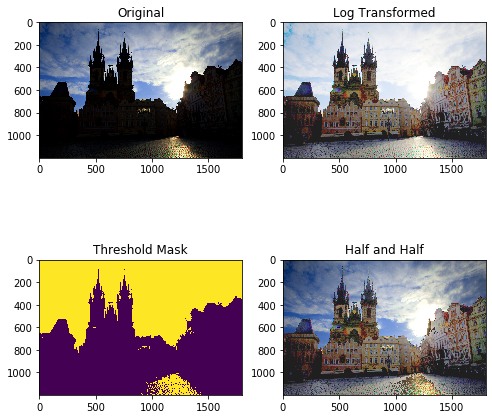

In [5]:

#Hard coded cutoff in this example.

Inew = np.zeros(Ic.shape)
blueThresh = I[...,2] > 50

Ic = Ic/Ic.ravel().max() #place Ic in [0,1] like Ilog.

for c in range(3): #Use original if intensity was bright enough.
    Inew[blueThresh, c] = Ic[blueThresh, c]

for c in range(3): #Use log transformed if too dark.
    Inew[~blueThresh, c] = Ilog[~blueThresh, c]

f, axarr3 = plt.subplots(2,2, figsize=(8,8))
axarr3[0,0].imshow(I)
axarr3[0,0].set_title('Original')

axarr3[0,1].imshow(Ilog)
axarr3[0,1].set_title('Log Transformed')

axarr3[1,0].imshow(blueThresh.astype(float))
axarr3[1,0].set_title('Threshold Mask')

axarr3[1,1].imshow(Inew)
axarr3[1,1].set_title('Half and Half')
axarr3[1,1].set_title('Half and Half')

